In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
%matplotlib inline

In [2]:
df = pd.read_excel("RomaniaEDF.xlsx")

In [3]:
print("="*50)
print("First Five Rows ","\n")
print(df.head(5),"\n")



First Five Rows  

   Year  Month  Day  Hour   Value
0  2006      1    1     0  5957.0
1  2006      1    1     1  5837.0
2  2006      1    1     2  5592.0
3  2006      1    1     3  5383.0
4  2006      1    1     4  5201.0 



In [4]:
print("="*50)
print("Information About Dataset","\n")
print(df.info(),"\n")


Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119783 entries, 0 to 119782
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Year    119783 non-null  int64  
 1   Month   119783 non-null  int64  
 2   Day     119783 non-null  int64  
 3   Hour    119783 non-null  int64  
 4   Value   119771 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 4.6 MB
None 



In [5]:
print("="*50)
print("Describe the Dataset ","\n")
print(df.describe(),"\n")

Describe the Dataset  

                Year          Month            Day           Hour  \
count  119783.000000  119783.000000  119783.000000  119783.000000   
mean     2012.340691       6.426020      15.727582      11.755625   
std         3.947807       3.428687       8.799324       6.919113   
min      2006.000000       1.000000       1.000000       0.000000   
25%      2009.000000       3.000000       8.000000       6.000000   
50%      2012.000000       6.000000      16.000000      11.000000   
75%      2016.000000       9.000000      23.000000      18.000000   
max      2019.000000      12.000000      31.000000      23.000000   

               Value  
count  119771.000000  
mean     6080.856960  
std       912.327757  
min      3456.000000  
25%      5376.000000  
50%      6053.000000  
75%      6702.000000  
max      8940.000000   



In [6]:
print("="*50)
print("Null Values t ","\n")
print(df.isnull().sum(),"\n")

Null Values t  

Year      0
Month     0
Day       0
Hour      0
Value    12
dtype: int64 



No handles with labels found to put in legend.


Text(0.5, 1.0, 'Energy Consumption According to Year')

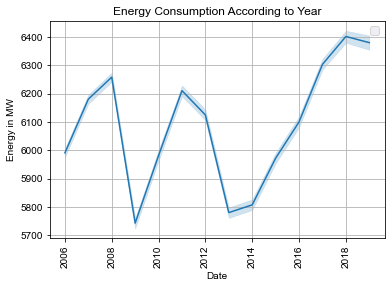

In [7]:
from matplotlib import style
dataset = df
fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')

sns.lineplot(x=dataset["Year"], y=dataset["Value"], data=df)
sns.set(rc={'figure.figsize':(15,6)})

plt.title("Energy consumptionnin Year 2004")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)


plt.title("Energy Consumption According to Year")

Text(0.5, 1.0, 'Ennergy Distribution')

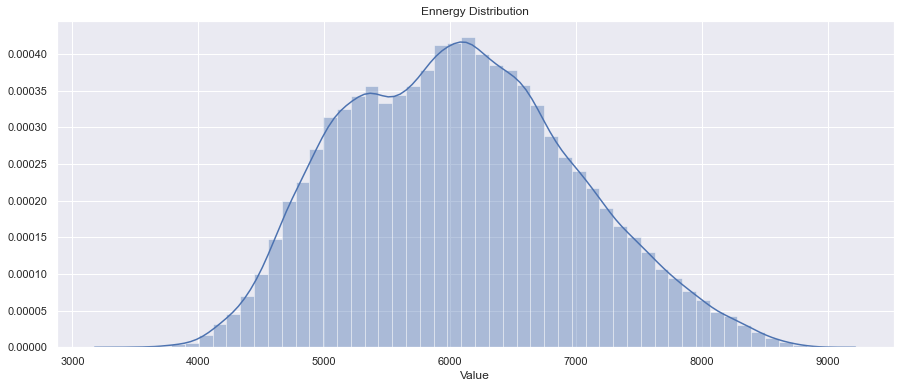

In [8]:
sns.distplot(dataset["Value"])
plt.title("Ennergy Distribution")

No handles with labels found to put in legend.


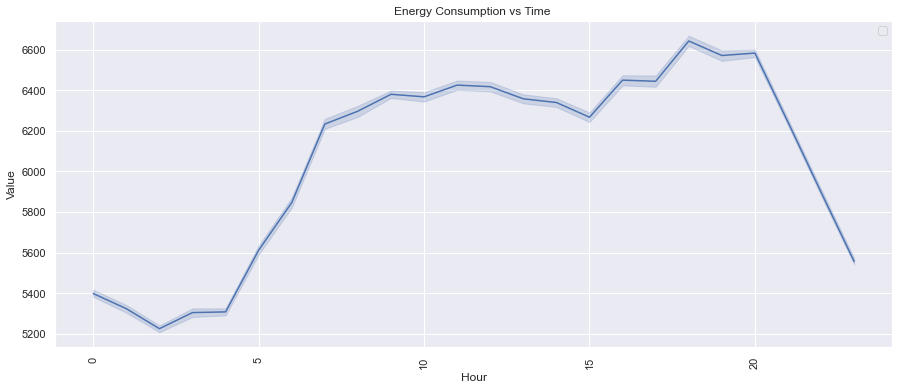

In [9]:
fig = plt.figure()
ax1= fig.add_subplot(111)

sns.lineplot(x=dataset["Hour"],y=dataset["Value"], data=df)
plt.title("Energy Consumption vs Time ")
plt.xlabel("Hour")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

In [10]:
df["Datetime"]=pd.to_datetime(df[["Year", "Month", "Day", "Hour"]])
dataset = df
dataset["Month"] = pd.to_datetime(df["Datetime"]).dt.month
dataset["Year"] = pd.to_datetime(df["Datetime"]).dt.year
dataset["Date"] = pd.to_datetime(df["Datetime"]).dt.date
dataset["Time"] = pd.to_datetime(df["Datetime"]).dt.time
dataset["Week"] = pd.to_datetime(df["Datetime"]).dt.week
dataset["Day"] = pd.to_datetime(df["Datetime"]).dt.day_name()
dataset = df.set_index("Datetime")
dataset.index = pd.to_datetime(dataset.index)
dataset.head(1)

,Year,Month,Day,Hour,Value,Date,Time,Week
Datetime,,,,,,,,
2006-01-01,2006,1,Sunday,0,5957.0,2006-01-01,00:00:00,52


In [11]:
NewDataSet = dataset.resample('MS').mean()

In [12]:
print("Old Dataset ",dataset.shape )
print("New  Dataset ",NewDataSet.shape )

Old Dataset  (119783, 8)
New  Dataset  (164, 5)


In [13]:
TestData = NewDataSet.tail(100)

Training_Set = NewDataSet.iloc[:,0:1]

Training_Set = Training_Set[:-60]

print("Training Set Shape ", Training_Set.shape)
print("Test Set Shape ", TestData.shape)

Training Set Shape  (104, 1)
Test Set Shape  (100, 5)


In [14]:
Training_Set = Training_Set.values
sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)

NameError: name 'MinMaxScaler' is not defined